
# Identifying Flower Types Using K-means Clustering




**Jheyne de Oliveira Panta Cardeiro**, **Puqi Liu**, **Sukhmani Thukral**  
*CS 510: Artificial Intelligence for Data Science, MSCS, City University of Seattle*  
deoliveirapantacord@cityuniversity.edu, liupuqi@cityuniversity.edu, thukralsukhmani@cityuniversity.edu  



## Abstract

This project analyses the use of K-means clustering to identify natural patterns in flower measurements using the Iris dataset. This is done by comprising petal and sepal dimensions across three iris species. The dataset is used for implementing unsupervised learning, and we work on the structure without actual class labels.

For understanding the algorithm's behavior, we implement K-means manually, focusing on how data points are assigned to clusters, centroids are recalculated, and stability is achieved through iterative updates.

We evaluate clustering performance using inertia, wherein, we study the quantifying internal compactness and silhouette scores for assessing separation between clusters, using techniques such as the Elbow Method to determine the most suitable number of clusters.

To improve interpretability, Principal Component Analysis is used to condense the four-dimensional feature space into two dimensions, supporting visualizations of clusters through scatter plots.

The results are compared against scikit-learn's built-in KMeans function, and alignment with the actual flower types using metrics like purity and Rand index. This study helps understand unsupervised learning in action and demonstrates how meaningful groupings can emerge from data without known outcomes.

**Keywords:** K-means Clustering, K-means, Unsupervised Learning, E-commerce Analytics, Data Preprocessing, Data Visualization.


## Literature Review

K-Means is one of the most widely used unsupervised learning algorithms in machine learning. It was first introduced by MacQueen in 1967 and is mainly used to group data points into clusters based on how similar they are. The goal is to ensure that data points within the same cluster are as close together as possible, while being different from points in other clusters.

The Iris dataset, introduced by Ronald Fisher in the 1930s, is a well-known dataset used to test clustering and classification techniques. It contains measurements for three types of iris flowers, focusing on petal and sepal length and width. Because of its simplicity and clear structure, it is often used in educational settings and for demonstrating algorithms like K-Means.

Today, most people use libraries like scikit-learn to implement K-Means. The algorithm it uses is based on Lloyd’s method, which repeatedly updates cluster centers (called centroids) and reassigns points until the algorithm converges. However, the performance of K-Means can be affected by the choice of initial centroids and whether or not the data has been scaled. That’s why preprocessing techniques like Principal Component Analysis (PCA) are sometimes used before clustering.

To evaluate clustering results, we use internal metrics like inertia (how compact the clusters are) and silhouette score (how well-separated the clusters are). When true labels are available, we can also compare the clustering results using external metrics like purity and the Rand Index to measure how closely the predicted clusters match the actual classes.

Researchers and educators often recommend using PCA not only to improve clustering, but also to reduce the number of dimensions so that clustering results can be visualized more easily—especially in teaching and exploratory analysis.


## Methodology

This project evaluates how K‑Means clustering can group Iris flower data without using actual labels, using both a manual algorithm and scikit-learn for validation.

1. **Data Loading & Preprocessing**
   - Loaded the Iris dataset (150 samples, 4 numeric features).
   - Standardized feature values to ensure even scaling for distance calculations.

2. **Manual K-Means Implementation**
   - Randomly initialized three centroids.
   - Assigned each point to the nearest centroid via Euclidean distance.
   - Updated centroids by averaging assigned points.
   - Repeated until centroids stabilized or 100 iterations reached.

3. **Cluster Evaluation**
   - Measured **Inertia** (compactness) and **Silhouette Score** (cluster separation).

4. **Dimensionality Reduction via PCA**
   - Reduced four input features to two principal components.
   - Created 2D scatter plots for cluster visualization.

5. **Comparison with scikit-learn**
   - Ran scikit-learn’s `KMeans` with identical settings.
   - Compared metrics (inertia, silhouette).
   - Evaluated cluster alignment with true labels using **Purity** and **Rand Index**.


Step 1: Set Up Your Environment


In [2]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


Step 2: Load and Explore the Iris Dataset

We are working with: 150 samples, 4 features (petal & sepal width/length), no labels used in clustering.

In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Step 3: Preprocess – Standardize the Data

K-Means is distance-based, so we scale the data first.

In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


Step 4: Choose Number of Clusters Using Elbow Method
We looked for the "elbow" point — where inertia starts to level off.

  k=3 

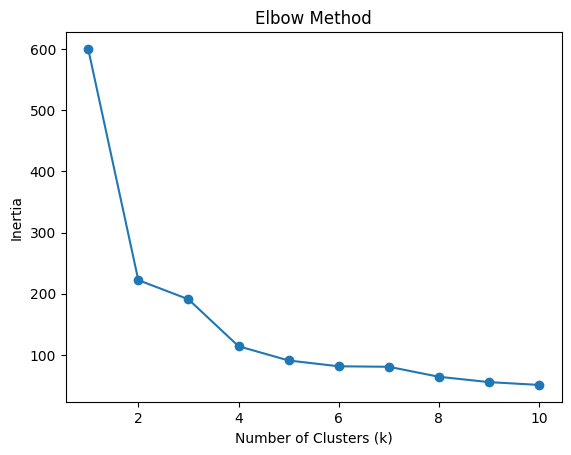

In [5]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


Step 5: Fit KMeans with Best K

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(scaled_data)
df['cluster'] = labels


Step 6: Evaluate with Silhouette Score
Value between -1 and 1. Closer to 1 = better separation.

In [7]:
score = silhouette_score(scaled_data, labels)
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.48


Step 7: Visualize Clusters with PCA (2D)

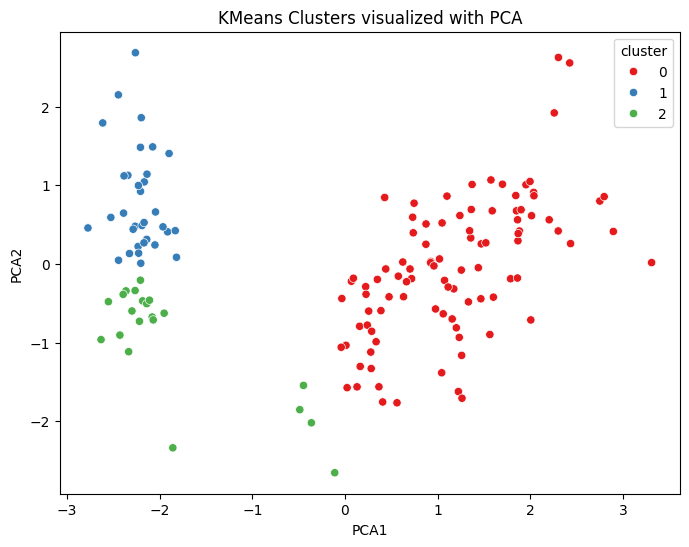

In [8]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='cluster', palette='Set1')
plt.title('KMeans Clusters visualized with PCA')
plt.show()


Compare with Actual Labels

In [9]:
df['actual'] = iris.target
pd.crosstab(df['cluster'], df['actual'])


actual,0,1,2
cluster,,,
0,0,46,50
1,33,0,0
2,17,4,0


In [10]:
pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 kB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 56.3 MB/s eta 0:00:00:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━ 10/11 [streamlit]  WARNING: The script streamlit is installed in '/usr/local/python/3.12.1/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11/11 [streamlit]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


2025-08-02 21:25:00.243 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 21:25:00.405 
  command:

    streamlit run /home/codespace/.local/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-08-02 21:25:00.406 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 21:25:00.406 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 21:25:00.410 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 21:25:00.411 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 21:25:00.411 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 21:25:00.412 Thread 'MainTh

DeltaGenerator()

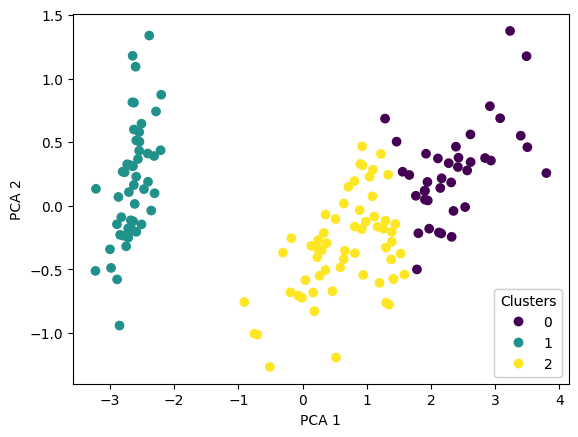

In [11]:
import streamlit as st
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

st.title("Identifying Flower Types Using K-means Clustering")

# Load Iris data
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

# Sidebar: select number of clusters
k = st.sidebar.slider("Number of clusters (k)", 1, 10, 3)

# Run KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_

# Dimensionality Reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Show PCA scatter plot with cluster labels
fig, ax = plt.subplots()
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
st.pyplot(fig)
